<a href="https://colab.research.google.com/github/jaguzman/GENERAL-FundamentosEnHerramientasDeTransformacionDigital/blob/master/Unidad%203%20-%20Aprendizaje%20de%20m%C3%A1quinas/2_Aprendizaje%20Supervisado/KVecinosMasCercanos_CreditoHipoteca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN**

**Crédito Hipotecario**

Se tiene una base de datos del riezgo de inclumpimiento de un crédito hipotecario. La variable 'TARGET' contiene la siguiente información binaría: 0 el cliente que pagaron el cliente a tiempo, 1 el que tuvo dificultad para pagar el crédito.

**Objetivo**

Crear un clasificador basado en KNN para determinar si un nuevo cliente cumplirá o no los pagos del crédito hipotecario.

Para mas información de la base de datos, consultar https://www.kaggle.com/c/home-credit-default-risk/data?select=application_train.csv

**Contenido**

*   Librerías
*   Base de datos
*   Descripción y analítica de datos
*   Preparación de los datos para el algoritmo
*   KNN: Clasificador
*   Realizar una predicción





# **LIBRERÍAS**

In [ ]:
# Importar las librerías
import pandas as pd
import numpy as np

# Librerías para graficar
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import graphviz

# Librerías de Aprendizaje de máquinas
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Librerías para evaluar los clasificadores
from sklearn.metrics import confusion_matrix

# **BASE DE DATOS**

In [ ]:
# Leer los datos desde el GitHub
bank = pd.read_csv(
    "https://raw.githubusercontent.com/jaguzman/dataSets/master/datasets/application_train_KNN.csv",
    sep = ',',         # Se especifica el separador de los datos
    thousands = None,  # Se especifica el separador de miles
    decimal = '.')     # Se especifica el separador de los decimales

# Imprimir el tamaño de la base de datos
print(bank.shape)
# Imprimir las primeras 7 líneas
bank.head(7)

(33310, 20)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE
0,0,Cash loans,M,Y,Y,0,202500.0,1724220.0,47412.0,1350000.0,State servant,Secondary / secondary special,Married,House / apartment,0.025164,-19142,-2826,-7628.0,-2700,3.0
1,0,Revolving loans,F,Y,Y,0,112500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Separated,House / apartment,0.008474,-20498,-4645,-4523.0,-3122,19.0
2,0,Cash loans,M,Y,Y,1,450000.0,1166724.0,34245.0,913500.0,Working,Higher education,Married,House / apartment,0.020713,-14881,-6223,-192.0,-5640,14.0
3,0,Cash loans,F,Y,N,0,270000.0,454500.0,23215.5,454500.0,Working,Higher education,Single / not married,House / apartment,0.014520,-19979,-3790,-1209.0,-3427,25.0
4,0,Cash loans,M,Y,N,0,90000.0,204858.0,14566.5,171000.0,Working,Secondary / secondary special,Married,House / apartment,0.030755,-15491,-684,-9534.0,-4499,12.0
5,0,Cash loans,M,Y,N,1,360000.0,1125000.0,33025.5,1125000.0,Commercial associate,Higher education,Married,House / apartment,0.035792,-10456,-234,-4597.0,-3054,4.0
6,0,Cash loans,M,Y,Y,0,180000.0,239850.0,25186.5,225000.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,0.046220,-13671,-473,-7709.0,-4482,18.0


In [ ]:
# Información de la base de datos: nómbre de la columba, conteo de datos Null y tipo de datos
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33310 entries, 0 to 33309
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TARGET                      33310 non-null  int64  
 1   NAME_CONTRACT_TYPE          33310 non-null  object 
 2   CODE_GENDER                 33310 non-null  object 
 3   FLAG_OWN_CAR                33310 non-null  object 
 4   FLAG_OWN_REALTY             33310 non-null  object 
 5   CNT_CHILDREN                33310 non-null  int64  
 6   AMT_INCOME_TOTAL            33310 non-null  float64
 7   AMT_CREDIT                  33310 non-null  float64
 8   AMT_ANNUITY                 33310 non-null  float64
 9   AMT_GOODS_PRICE             33310 non-null  float64
 10  NAME_INCOME_TYPE            33310 non-null  object 
 11  NAME_EDUCATION_TYPE         33310 non-null  object 
 12  NAME_FAMILY_STATUS          33310 non-null  object 
 13  NAME_HOUSING_TYPE           333

# **DESCRIPCIÓN Y ANALÍTICA DE DATOS**

Graficar la cantidad de personas que se que cumplieron y las que incumplieron

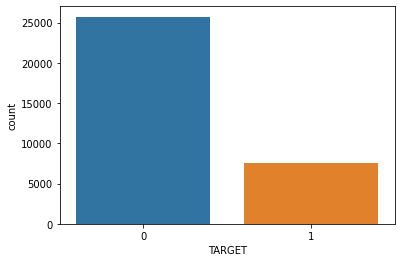

In [ ]:
# Esta función realiza una suma de cada categoría y luego las grafica 
sns.countplot(bank['TARGET']) 

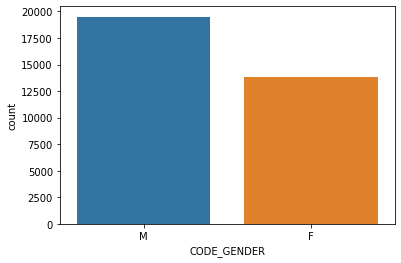

In [ ]:
# Graficar la cantidad de personas con respecto a su género

# Esta función realiza una suma de cada categoría y luego las grafica 
sns.countplot(bank['CODE_GENDER']) 

Text(0.5, 1.0, 'Distribución de la edad de los clientes')

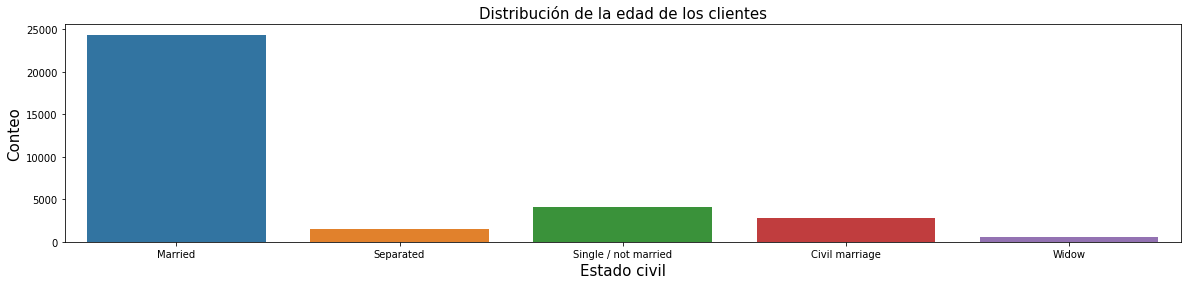

In [ ]:
# Graficar la cantidad de personas con respecto a su estado civil

# crear las variables para la gráfica de la figura y los ejes
fig, ax = plt.subplots() 
# definir el tamaño de la gráfica
fig.set_size_inches(20, 4) 
# Columna de la base de datos que se graficará
sns.countplot(x='NAME_FAMILY_STATUS', data = bank) 
# eje x
ax.set_xlabel('Estado civil', fontsize=15) 
# eje y
ax.set_ylabel('Conteo', fontsize=15) 
# título de la gráfica
ax.set_title('Distribución de la edad de los clientes', fontsize=15) 

Text(0.5, 1.0, 'Distribución de la edad de los clientes')

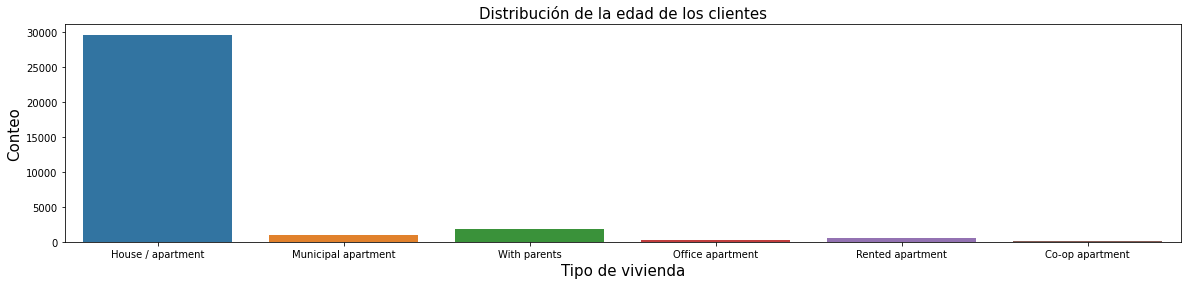

In [ ]:
# Graficar la cantidad de personas con respecto al tipo de vivienda

# crear las variables para la gráfica de la figura y los ejes
fig, ax = plt.subplots() 
# definir el tamaño de la gráfica
fig.set_size_inches(20, 4) 
# Columna de la base de datos que se graficará
sns.countplot(x='NAME_HOUSING_TYPE', data = bank) 
# eje x
ax.set_xlabel('Tipo de vivienda', fontsize=15) 
# eje y
ax.set_ylabel('Conteo', fontsize=15) 
# título de la gráfica
ax.set_title('Distribución de la edad de los clientes', fontsize=15) 

Text(0.5, 1.0, 'Distribución de la edad de los clientes')

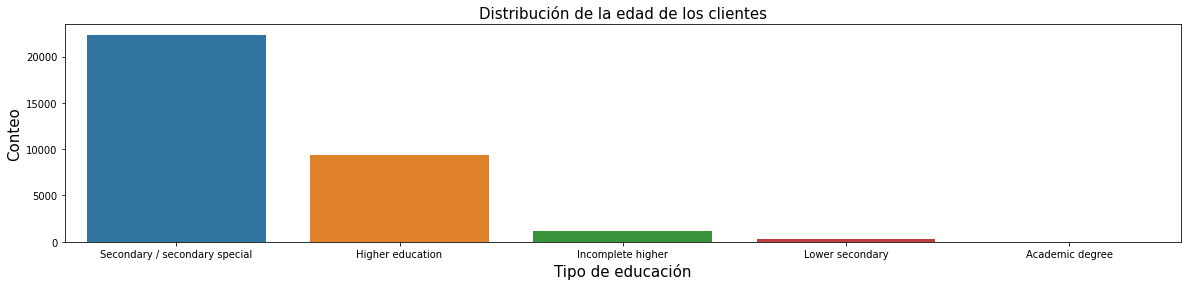

In [ ]:
# crear las variables para la gráfica de la figura y los ejes
fig, ax = plt.subplots() 
# definir el tamaño de la gráfica
fig.set_size_inches(20, 4) 
# Columna de la base de datos que se graficará
sns.countplot(x='NAME_EDUCATION_TYPE', data = bank) 
# eje x
ax.set_xlabel('Tipo de educación', fontsize=15) 
# eje y
ax.set_ylabel('Conteo', fontsize=15) 
# título de la gráfica
ax.set_title('Distribución de la edad de los clientes', fontsize=15) 

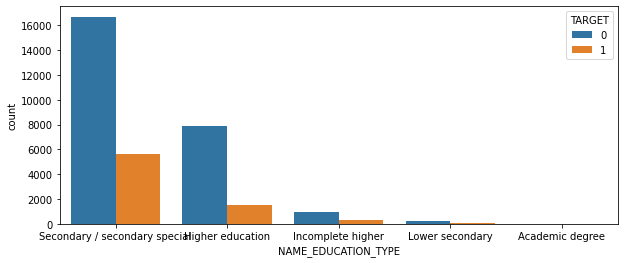

In [ ]:
# Graficar la relación el estudios y la capacidad de pago del cliente.

# Tamaño de la gráfica
plt.figure(figsize=(10,4))
# Suma y gráfica del estado civil y agrupados por la respuesta final del cliente
sns.countplot(x="NAME_EDUCATION_TYPE", hue="TARGET", data=bank)

# **PREPARACIÓN DE LOS DATOS PARA EL ALGORITMO**

Pasar de variables categórica a variable numéricas

In [ ]:
# Definición de la función LabelEncoder
labelencoder_X = LabelEncoder()
# Realizar la conversión a todas las variables categoricas asignandóles un número iniciando desde 0
bank['NAME_CONTRACT_TYPE'] = labelencoder_X.fit_transform(bank['NAME_CONTRACT_TYPE'])
bank['CODE_GENDER']      = labelencoder_X.fit_transform(bank['CODE_GENDER']) 
bank['FLAG_OWN_CAR']  = labelencoder_X.fit_transform(bank['FLAG_OWN_CAR']) 
bank['FLAG_OWN_REALTY']= labelencoder_X.fit_transform(bank['FLAG_OWN_REALTY']) 
bank['NAME_INCOME_TYPE']  = labelencoder_X.fit_transform(bank['NAME_INCOME_TYPE'])
bank['NAME_EDUCATION_TYPE']  = labelencoder_X.fit_transform(bank['NAME_EDUCATION_TYPE'])
bank['NAME_FAMILY_STATUS']  = labelencoder_X.fit_transform(bank['NAME_FAMILY_STATUS']) 
bank['NAME_HOUSING_TYPE']  = labelencoder_X.fit_transform(bank['NAME_HOUSING_TYPE'])

# Imprimir los primeros 5 datos de la base de datos 
bank

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE
0,0,0,1,0,1,0,202500.0,1724220.0,47412.0,1350000.0,4,4,1,1,0.025164,-19142,-2826,-7628.0,-2700,3.0
1,0,1,0,0,1,0,112500.0,135000.0,6750.0,135000.0,6,4,2,1,0.008474,-20498,-4645,-4523.0,-3122,19.0
2,0,0,1,0,1,1,450000.0,1166724.0,34245.0,913500.0,6,1,1,1,0.020713,-14881,-6223,-192.0,-5640,14.0
3,0,0,0,0,0,0,270000.0,454500.0,23215.5,454500.0,6,1,3,1,0.014520,-19979,-3790,-1209.0,-3427,25.0
4,0,0,1,0,0,0,90000.0,204858.0,14566.5,171000.0,6,4,1,1,0.030755,-15491,-684,-9534.0,-4499,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33305,1,0,1,0,0,0,121500.0,101880.0,10566.0,90000.0,6,1,3,5,0.006296,-8809,-1022,-3576.0,-1482,0.0
33306,1,0,1,0,1,0,261000.0,945000.0,37471.5,945000.0,6,4,1,1,0.072508,-15796,-250,-7086.0,-4487,3.0
33307,1,0,0,0,0,0,202500.0,540000.0,17419.5,540000.0,6,4,1,1,0.015221,-15477,-2021,-4533.0,-4538,2.0
33308,1,1,1,0,0,2,270000.0,765000.0,38250.0,765000.0,6,1,1,1,0.004960,-11344,-2712,-5498.0,-3502,6.0


In [ ]:
# descripción de todas las variables de la base de datos
bank.describe()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE
count,33310.000000,33310.000000,33310.00000,33310.0,33310.000000,33310.000000,3.331000e+04,3.331000e+04,33310.000000,3.331000e+04,33310.000000,33310.000000,33310.000000,33310.000000,33310.000000,33310.000000,33310.000000,33310.000000,33310.000000,33310.000000
mean,0.227439,0.092345,0.58523,0.0,0.693395,0.519664,1.938238e+05,6.554219e+05,29783.749715,5.900279e+05,4.281387,3.068898,1.253257,1.300811,0.021252,-15136.247763,31826.190693,-4491.850525,-2951.541069,12.306575
std,0.419185,0.289516,0.49269,0.0,0.461091,0.779758,1.225721e+05,4.248513e+05,15450.323310,3.926578e+05,2.163202,1.355163,0.839405,0.984949,0.013790,3962.703699,106559.263147,3257.665920,1511.445729,12.076688
min,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,2.565000e+04,4.500000e+04,1993.500000,4.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000533,-25179.000000,-15095.000000,-22113.000000,-6551.000000,0.000000
25%,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,1.305000e+05,3.081330e+05,18923.625000,2.700000e+05,1.000000,1.000000,1.000000,1.000000,0.010032,-18058.000000,-2812.750000,-6697.000000,-4280.000000,5.000000
50%,0.000000,0.000000,1.00000,0.0,1.000000,0.000000,1.755000e+05,5.450400e+05,27263.250000,4.545000e+05,6.000000,4.000000,1.000000,1.000000,0.019101,-14723.000000,-1391.500000,-4082.500000,-3164.500000,10.000000
75%,0.000000,0.000000,1.00000,0.0,1.000000,1.000000,2.250000e+05,9.000000e+05,37800.000000,8.100000e+05,6.000000,4.000000,1.000000,1.000000,0.028663,-11896.000000,-532.000000,-1695.000000,-1655.000000,15.000000
max,1.000000,1.000000,1.00000,0.0,1.000000,11.000000,6.750000e+06,4.050000e+06,225000.000000,4.050000e+06,6.000000,4.000000,4.000000,5.000000,0.072508,-7680.000000,365243.000000,0.000000,0.000000,91.000000


# **KNN: CLASIFICADOR**

Se separa la base de datos entre datos de entrenamiento y datos de pruebas (80% - 20%)

In [ ]:
# Se toma la base de datos menos la variable de interes 'deposit'
x = bank.drop('TARGET', 1)
# Se toma la variable de interés
y = bank.TARGET
# Función que separa los datos datos de X y Y de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [ ]:
# Modelo de KNN con k = 7
knn = KNeighborsClassifier(n_neighbors = 15)
# Entrenamiento del modelo
knn.fit(x_train,y_train)
# Cálculo de la exactitud
prediction = knn.predict(x_test)
# Imprimir el resultado
print("Exactitud: ", knn.score(x_test,y_test))

Exactitud:  0.7704893425397779


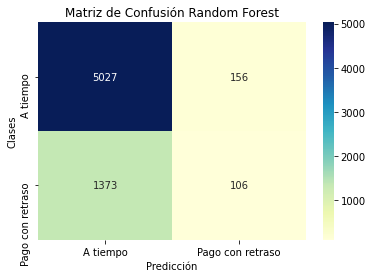

In [ ]:
# Matriz de confusión

# Predicción del modelo
y_pred = knn.predict(x_test)
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Nombres de las clases
target_names = ['A tiempo', 'Pago con retraso']
# Propiedades de la gráfica
ax = plt.subplot()
# Imprimir la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
# Nombre del eje x
ax.set_xlabel('Predicción');
# Nombre del eje y
ax.set_ylabel('Clases'); 
# Título de la gráfica
ax.set_title('Matriz de Confusión Random Forest'); 
# Nombres de las clases en eje x
ax.xaxis.set_ticklabels(target_names); 
# Nombres de las clases en eje y
ax.yaxis.set_ticklabels(target_names);

# **REALIZAR UNA PREDICCIÓN**

Si se tiene un cliente nuevo con los siguientes datos:

NAME_CONTRACT_TYPE:                 0.00

CODE_GENDER:                        0.00

FLAG_OWN_CAR:                       0.00

FLAG_OWN_REALTY:                    1.00

CNT_CHILDREN:                       1.00

AMT_INCOME_TOTAL:              123750.00

AMT_CREDIT:                    675000.00

AMT_ANNUITY:                    28597.50

AMT_GOODS_PRICE:               675000.00

NAME_INCOME_TYPE:                   3.00

NAME_EDUCATION_TYPE:                4.00

NAME_FAMILY_STATUS:                 1.00

NAME_HOUSING_TYPE:                  1.00

REGION_POPULATION_RELATIVE:         0.025164

DAYS_BIRTH:                    -21050.00

DAYS_EMPLOYED:                 365243.00

DAYS_REGISTRATION:             -11709.00

DAYS_ID_PUBLISH:                -4386.00

OWN_CAR_AGE:                       14.00

¿El cliente tendrá o no dificultades para pagar?

In [ ]:
# Se organiza el DataFrame
df = pd.DataFrame({'NAME_CONTRACT_TYPE':[0.00], 'CODE_GENDER':[0.00], 'FLAG_OWN_CAR':[0.00], 'FLAG_OWN_REALTY':[1.00], 'CNT_CHILDREN':[1.00], 'AMT_INCOME_TOTAL':[123750.00], 'AMT_CREDIT':[675000.00], 'AMT_ANNUITY':[28597.50], 'AMT_GOODS_PRICE':[675000.00], 'NAME_INCOME_TYPE':[3.00], 'NAME_EDUCATION_TYPE':[4.00], 'NAME_FAMILY_STATUS':[1.00], 'NAME_HOUSING_TYPE':[1.00], 'REGION_POPULATION_RELATIVE':[0.025164], 'DAYS_BIRTH':[-21050.00], 'DAYS_EMPLOYED':[365243.00], 'DAYS_REGISTRATION':[-11709.00], 'DAYS_ID_PUBLISH':[-4386.00], 'OWN_CAR_AGE':[14.00]})
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE
0,0.0,0.0,0.0,1.0,1.0,123750.0,675000.0,28597.5,675000.0,3.0,4.0,1.0,1.0,0.025164,-21050.0,365243.0,-11709.0,-4386.0,14.0


In [ ]:
# Se realiza la predicción
prediction = knn.predict(df)
# Se muestra la predicción
prediction

array([0])

El cliente, con las características dadas, **SI** pagará a tiempo.